In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pickle
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
from scipy.integrate import simps
from scipy.optimize import minimize
import emcee
import corner
from lal import C_SI
plt.rcParams.update({'font.size': 15})
matplotlib.rcParams['text.usetex'] = True

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [11]:
def dipole_cal(g, ra, dec, l=264, b=48):
    dipole_gal = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
    dipole_ICRS = dipole_gal.transform_to('icrs')

    phi_dipole = dipole_ICRS.ra.value*np.pi/180
    theta_dipole = np.pi/2-dipole_ICRS.dec.value*np.pi/180

    nx_dipole = np.cos(phi_dipole)*np.sin(theta_dipole)
    ny_dipole = np.sin(phi_dipole)*np.sin(theta_dipole)
    nz_dipole = np.cos(theta_dipole)

    phi = ra
    theta = np.pi/2-np.array(dec)

    nx = np.cos(phi)*np.sin(theta)
    ny = np.sin(phi)*np.sin(theta)
    nz = np.cos(theta)

    dipole = g*(nx_dipole*nx + ny_dipole*ny + nz_dipole*nz)

    return dipole

In [12]:
fr = open("/home/ansonchen/cosmic_dipole_gw/ET_A#_golden/seed_1/BBH/GW_injections_ET_A#.p", "rb")
XG_BBH_inj = pickle.load(fr)
fr.close()

In [13]:
fr = open("/home/ansonchen/cosmic_dipole_gw/ET_A#_golden/seed_1/NSBH/GW_injections_ET_A#.p", "rb")
XG_NSBH_inj = pickle.load(fr)
fr.close()

In [14]:
fr = open("/home/ansonchen/cosmic_dipole_gw/ET_A#_golden/seed_1/BNS/GW_injections_ET_A#.p", "rb")
XG_BNS_inj = pickle.load(fr)
fr.close()

In [15]:
dl_0_BBH = XG_BBH_inj['injections_parameters']['dls']
dl_0_NSBH = XG_NSBH_inj['injections_parameters']['dls']
dl_0_BNS = XG_BNS_inj['injections_parameters']['dls']

In [16]:
XG_BBH_inj['injections_parameters']['dets_pe']

[array(['V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['V1'], dtype='<U2'),
 array(['L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['L1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['L1'], dtype='<U2'),
 array(['L1', 'V1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['V1'], dtype='<U2'),
 array(['H1', 'L1'], dtype='<U2'),
 array(['H1', 'L1', 'V1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['H1', 'V1'], dtype='<U2'),
 array(['H1', 'L1',

In [17]:
index_BBH = []
index_NSBH = []
index_BNS = []

for i in range(len(dl_0_BBH)):
    try:
        data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BBH_cov_{i}.txt')
        if len(XG_BBH_inj['injections_parameters']['dets_pe'][i])>1 and 4*4*np.sqrt(data[4,4])*np.sqrt(data[5,5])*180*180/np.pi/np.pi<0.06 and dl_0_BBH[i]<461:
            index_BBH.append(i)
    except:
        continue

for i in range(len(dl_0_NSBH)):
    try:
        data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/NSBH_cov_{i}.txt')
        if len(XG_NSBH_inj['injections_parameters']['dets_pe'][i])>1 and 4*4*np.sqrt(data[4,4])*np.sqrt(data[5,5])*180*180/np.pi/np.pi<0.06 and dl_0_NSBH[i]<461:
            index_NSBH.append(i)
    except:
        continue

for i in range(len(dl_0_BNS)):
    try:
        data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BNS_cov_{i}.txt')
        if len(XG_BNS_inj['injections_parameters']['dets_pe'][i])>1 and 4*4*np.sqrt(data[4,4])*np.sqrt(data[5,5])*180*180/np.pi/np.pi<0.06 and dl_0_BNS[i]<461:
            index_BNS.append(i)
    except:
        continue


In [18]:
len(index_BBH),len(index_NSBH),len(index_BNS)

(13, 0, 0)

In [19]:
index_BBH

[1, 8, 9, 15, 17, 32, 33, 37, 42, 46, 50, 54, 57]

In [20]:
index_NSBH

[]

In [21]:
index_BNS

[]

In [22]:
# samples = [0]*(len(index_BBH)+len(index_NSBH)+len(index_BNS))
# for i,ind in enumerate(index_BBH):
#     samples[i] = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/Fisher_sampler_XG_golden_seed_1_g0p001/BBH_Fisher_samples_{ind}.dat', names=True)
# for i,ind in enumerate(index_NSBH):
#     samples[len(index_BBH)+i] = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/Fisher_sampler_XG_golden_seed_1_g0p001/NSBH_Fisher_samples_{ind}.dat', names=True)
# for i,ind in enumerate(index_BNS):
#     samples[len(index_BBH)+len(index_NSBH)+i] = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/Fisher_sampler_XG_golden_seed_1_g0p001/BNS_Fisher_samples_{ind}.dat', names=True)


In [23]:
index_all = np.append(np.append(np.array(index_BBH),np.array(index_NSBH)),np.array(index_BNS))

In [24]:
# fig = plt.figure(figsize=(26,25))
# gs = gridspec.GridSpec(10, 8, wspace=0.1)

# for i in range(0,10):
#     for j in range(0,8):

#         if 8*i+j >= len(index_BBH)+len(index_NSBH)+len(index_BNS):
#             break

#         ax = plt.subplot(gs[8*i+j])
#         plt.title('event %d'%index_all[8*i+j])

#         plt.hist(samples[8*i+j]['ra']/np.pi*180,bins=50,histtype='step')

#         plt.axvline(np.mean(samples[8*i+j]['ra']/np.pi*180),color='k',linestyle='--',alpha=0.6)

#         if j==0:
#             ax.set_ylabel('likelihood',fontsize=15)

#         ax.set_yticklabels([])
#         # plt.xlim(10,200)
#         plt.ylim(bottom=0)

In [25]:
# fig = plt.figure(figsize=(26,25))
# gs = gridspec.GridSpec(10, 8, wspace=0.1)

# for i in range(0,10):
#     for j in range(0,8):

#         if 8*i+j >= len(index_BBH)+len(index_NSBH)+len(index_BNS):
#             break

#         ax = plt.subplot(gs[8*i+j])
#         plt.title('event %d'%index_all[8*i+j])

#         plt.hist(samples[8*i+j]['dec']/np.pi*180,bins=50,histtype='step')

#         plt.axvline(np.mean(samples[8*i+j]['dec']/np.pi*180),color='k',linestyle='--',alpha=0.6)

#         if j==0:
#             ax.set_ylabel('likelihood',fontsize=15)

#         ax.set_yticklabels([])
#         # plt.xlim(10,200)
#         plt.ylim(bottom=0)

In [26]:
# ra_std = [0]*len(index_all)
# dec_std = [0]*len(index_all)
# ra_mean = [0]*len(index_all)
# dec_mean = [0]*len(index_all)
# for i in range(len(index_all)):
#     ra_std[i] = np.std(samples[i]['ra'])
#     dec_std[i] = np.std(samples[i]['dec'])
#     ra_mean[i] = np.mean(samples[i]['ra'])
#     dec_mean[i] = np.mean(samples[i]['dec'])

In [27]:
zs = [0]*len(index_all)
ra_mean = [0]*len(index_all)
dec_mean = [0]*len(index_all)

for i,ind in enumerate(index_BBH):
    zs[i] = XG_BBH_inj['injections_parameters']['zs'][ind]
    ra_mean[i] = XG_BBH_inj['injections_parameters']['ras'][ind]
    dec_mean[i] = XG_BBH_inj['injections_parameters']['decs'][ind]
for i,ind in enumerate(index_NSBH):
    zs[len(index_BBH)+i] = XG_NSBH_inj['injections_parameters']['zs'][ind]
    ra_mean[len(index_BBH)+i] = XG_NSBH_inj['injections_parameters']['ras'][ind]
    dec_mean[len(index_BBH)+i] = XG_NSBH_inj['injections_parameters']['decs'][ind]
for i,ind in enumerate(index_BNS):
    zs[len(index_BBH)+len(index_NSBH)+i] = XG_BNS_inj['injections_parameters']['zs'][ind]
    ra_mean[len(index_BBH)+len(index_NSBH)+i] = XG_BNS_inj['injections_parameters']['ras'][ind]
    dec_mean[len(index_BBH)+len(index_NSBH)+i] = XG_BNS_inj['injections_parameters']['decs'][ind]

In [28]:
g=0.001

z0 = [0]*len(index_all)
for i,ind in enumerate(index_BBH):
    z0[i] = (1+zs[i]) * (1+dipole_cal(g, XG_BBH_inj['injections_parameters']['ras'][ind], XG_BBH_inj['injections_parameters']['decs'][ind])) -1
for i,ind in enumerate(index_NSBH):
    z0[len(index_BBH)+i] = (1+zs[len(index_BBH)+i]) * (1+dipole_cal(g, XG_NSBH_inj['injections_parameters']['ras'][ind], XG_NSBH_inj['injections_parameters']['decs'][ind])) -1
for i,ind in enumerate(index_BNS):
    z0[len(index_BBH)+len(index_NSBH)+i] = (1+zs[len(index_BBH)+len(index_NSBH)+i]) * (1+dipole_cal(g, XG_BNS_inj['injections_parameters']['ras'][ind], XG_BNS_inj['injections_parameters']['decs'][ind])) -1


In [29]:
ra_std = [0]*len(index_all)
dec_std = [0]*len(index_all)

for i,ind in enumerate(index_BBH):
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BBH_cov_{ind}.txt')
    ra_std[i] = np.sqrt(data[4,4])
    dec_std[i] = np.sqrt(data[5,5])
for i,ind in enumerate(index_NSBH):
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/NSBH_cov_{ind}.txt')
    ra_std[len(index_BBH)+i] = np.sqrt(data[4,4])
    dec_std[len(index_BBH)+i] = np.sqrt(data[5,5])
for i,ind in enumerate(index_BNS):
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BNS_cov_{ind}.txt')
    ra_std[len(index_BBH)+len(index_NSBH)+i] = np.sqrt(data[4,4])
    dec_std[len(index_BBH)+len(index_NSBH)+i] = np.sqrt(data[5,5])    

In [30]:
np.array(ra_std)/np.pi*180

array([0.09123783, 0.05328066, 0.10528176, 0.05818963, 0.1063344 ,
       0.04885883, 0.02509928, 0.03474699, 0.04400735, 0.03389467,
       0.01391417, 0.09185758, 0.1227146 ])

In [31]:
np.array(dec_std)/np.pi*180

array([0.01973667, 0.06329112, 0.01905789, 0.04998446, 0.01595979,
       0.05539398, 0.11627521, 0.06732126, 0.07614456, 0.04898986,
       0.01628816, 0.01263325, 0.02268454])

In [32]:
np.array(ra_std)/np.pi*180*np.array(dec_std)/np.pi*180

array([0.00180073, 0.00337219, 0.00200645, 0.00290858, 0.00169708,
       0.00270649, 0.00291842, 0.00233921, 0.00335092, 0.00166049,
       0.00022664, 0.00116046, 0.00278372])

In [33]:
dl_mean = [0]*len(index_all)
dl_std = [0]*len(index_all)

for i,ind in enumerate(index_BBH):
    dl_mean[i] = dl_0_BBH[ind] * (1+dipole_cal(g, XG_BBH_inj['injections_parameters']['ras'][ind], XG_BBH_inj['injections_parameters']['decs'][ind]))
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BBH_cov_{ind}.txt')
    dl_std[i] = np.sqrt(data[2,2])
for i,ind in enumerate(index_NSBH):
    dl_mean[len(index_BBH)+i] = dl_0_NSBH[ind] * (1+dipole_cal(g, XG_NSBH_inj['injections_parameters']['ras'][ind], XG_NSBH_inj['injections_parameters']['decs'][ind]))
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/NSBH_cov_{ind}.txt')
    dl_std[len(index_BBH)+i] = np.sqrt(data[2,2])
for i,ind in enumerate(index_BNS):
    dl_mean[len(index_BBH)+len(index_NSBH)+i] = dl_0_BNS[ind] * (1+dipole_cal(g, XG_BNS_inj['injections_parameters']['ras'][ind], XG_BNS_inj['injections_parameters']['decs'][ind])) 
    data = np.genfromtxt(f'/home/ansonchen/cosmic_dipole_gw/code/covariance_ET_A#_golden_seed_1_g0p001/BNS_cov_{ind}.txt')
    dl_std[len(index_BBH)+len(index_NSBH)+i] = np.sqrt(data[2,2])
 
    # dl_mean[i] = np.mean(samples[i]['luminosity_distance'])
    # dl_std[i] = np.std(samples[i]['luminosity_distance'])

In [34]:
def chi2_dl_dipole(glb, ra_arr, dec_arr, zs_arr, dl_mean, dl_std, H0=70, Om0=0.3):
    g = glb[0]
    l = glb[1]
    b = glb[2]
    
    dipole_gal = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
    dipole_ICRS = dipole_gal.transform_to('icrs')

    phi_dipole = dipole_ICRS.ra.value*np.pi/180
    theta_dipole = np.pi/2-dipole_ICRS.dec.value*np.pi/180

    nx_dipole = np.cos(phi_dipole)*np.sin(theta_dipole)
    ny_dipole = np.sin(phi_dipole)*np.sin(theta_dipole)
    nz_dipole = np.cos(theta_dipole)

    chi2 = 0

    for i in range(len(ra_arr)):
        phi = ra_arr[i]
        theta = np.pi/2-np.array(dec_arr[i])

        nx = np.cos(phi)*np.sin(theta)
        ny = np.sin(phi)*np.sin(theta)
        nz = np.cos(theta)

        dipole = g*(nx_dipole*nx + ny_dipole*ny + nz_dipole*nz)

        astropy_cosmology = FlatLambdaCDM(Om0=Om0,H0=H0)
        zt = (1+zs_arr[i])/(1+dipole) -1
        dl_0 = astropy_cosmology.luminosity_distance(zt).value
        dl_g = dl_0*(1+dipole)

        chi2 += (dl_mean[i]-dl_g)**2 / dl_std[i]**2

    return chi2


In [35]:
chi2_dl_dipole([1.250e-04, 268, 48], ra_mean, dec_mean, z0, dl_mean, dl_std, H0=70, Om0=0.3)

71.95237260539152

In [36]:
minimize(chi2_dl_dipole, [0,268,48], args=(ra_mean, dec_mean, z0, dl_mean, dl_std), method='Nelder-Mead')

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.4883303359373154e-12
             x: [ 1.000e-03  2.640e+02  4.800e+01]
           nit: 94
          nfev: 172
 final_simplex: (array([[ 1.000e-03,  2.640e+02,  4.800e+01],
                       [ 1.000e-03,  2.640e+02,  4.800e+01],
                       [ 1.000e-03,  2.640e+02,  4.800e+01],
                       [ 1.000e-03,  2.640e+02,  4.800e+01]]), array([ 1.488e-12,  2.906e-12,  4.837e-12,  6.075e-12]))

In [37]:
# cov_index = [0]*len(index)
# for i,ind in enumerate(index):
#     cov_data = np.loadtxt(f'covariance_XG_snr500/cov_{ind}.txt')
#     cov_index[i] = np.zeros((3,3))
#     cov_index[i][0,0] = cov_data[2,2]
#     cov_index[i][0,1:] = cov_data[2,4:]
#     cov_index[i][1:,0] = cov_data[4:,2]
#     cov_index[i][1:,1:] = cov_data[4:,4:]

In [87]:
def logprob_dl_g(glb, ra_arr, dec_arr, zs_arr, dl_mean, dl_std, H0=70, Om0=0.3):
    g = glb[0]
    l = glb[1]
    b = glb[2]

    if 0<=g<1 and 0<=l<360 and -90<=b<=90:

        dipole_gal = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
        dipole_ICRS = dipole_gal.transform_to('icrs')

        phi_dipole = dipole_ICRS.ra.value*np.pi/180
        theta_dipole = np.pi/2-dipole_ICRS.dec.value*np.pi/180

        nx_dipole = np.cos(phi_dipole)*np.sin(theta_dipole)
        ny_dipole = np.sin(phi_dipole)*np.sin(theta_dipole)
        nz_dipole = np.cos(theta_dipole)

        chi2 = 0

        for i in range(len(ra_arr)):
            phi = ra_arr[i]
            theta = np.pi/2-np.array(dec_arr[i])

            nx = np.cos(phi)*np.sin(theta)
            ny = np.sin(phi)*np.sin(theta)
            nz = np.cos(theta)

            dipole = g*(nx_dipole*nx + ny_dipole*ny + nz_dipole*nz)

            astropy_cosmology = FlatLambdaCDM(Om0=Om0,H0=H0)
            zt = (1+zs_arr[i])/(1+dipole) -1
            dl_0 = astropy_cosmology.luminosity_distance(zt).value
            dl_g = dl_0*(1+dipole)

            # x = np.array([dl_g, ra_arr[i], dec_arr[i]])
            # mu = np.array([dl_mean[i], ra_arr[i], dec_arr[i]])
            # diff = x - mu
            
            # chi2 += np.dot(diff, np.linalg.solve(cov_matrix, diff))
            chi2 += (dl_mean[i]-dl_g)**2 / dl_std[i]**2
        
        logprob = -0.5*chi2

    else:
        logprob = -np.inf

    return logprob


In [88]:
nwalkers = 32
ndim = 3
p0 = np.random.rand(nwalkers, ndim)*np.array([1,360,180]) - np.array([0,0,90])
print(p0)

[[ 7.91468106e-01  2.13455955e+02  3.99118501e+01]
 [ 9.63518635e-01  2.06111665e+02 -5.01158729e+00]
 [ 1.73304665e-01  3.00782397e+02  5.27433247e+01]
 [ 8.51118072e-01  3.35174888e+02  8.78159537e+01]
 [ 1.35978398e-02  1.94720394e+02  5.52148284e+01]
 [ 9.33589391e-01  2.54674275e+02 -7.64210650e+01]
 [ 1.63403143e-02  2.24703583e+02 -1.61001485e+01]
 [ 4.15241443e-01  1.49100885e+02  2.50409303e+01]
 [ 9.59295854e-01  2.97980907e+02 -5.32728312e+01]
 [ 5.81346636e-01  7.05081586e+01  4.78277524e+01]
 [ 2.25901646e-01  1.31950724e+02 -8.49686710e+01]
 [ 7.94025570e-01  1.06540463e+02  8.52619859e+01]
 [ 1.19862674e-01  3.24383942e+02 -7.35143891e+01]
 [ 8.84545124e-01  1.27103521e+02 -5.41963318e+01]
 [ 4.74137701e-01  8.21869188e+00 -7.82592678e+00]
 [ 3.06558896e-01  7.30573309e+01  1.90015533e+01]
 [ 2.71122401e-01  2.28677476e+02 -4.80140615e+01]
 [ 8.05778236e-01  2.62433715e+02  3.30862406e+01]
 [ 3.89301100e-01  1.79953977e+02 -2.32553133e+01]
 [ 3.68967082e-01  1.50676574e+

In [89]:
logprob_dl_g(p0[0], ra_mean, dec_mean, z0, dl_mean, dl_std)

-13499972.949044807

In [90]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob_dl_g, args=[ra_mean, dec_mean, z0, dl_mean, dl_std])


In [91]:
state = sampler.run_mcmc(p0, 100)
# sampler.reset()

(array([1.733e+03, 2.340e+02, 1.150e+02, 5.400e+01, 6.800e+01, 1.010e+02,
        3.200e+01, 3.900e+01, 4.000e+01, 2.300e+01, 4.100e+01, 1.800e+01,
        5.600e+01, 1.900e+01, 1.600e+01, 4.500e+01, 1.700e+01, 3.100e+01,
        3.300e+01, 6.000e+00, 1.000e+00, 8.000e+00, 1.500e+01, 2.000e+01,
        2.200e+01, 1.000e+01, 1.500e+01, 1.300e+01, 1.200e+01, 1.600e+01,
        1.100e+01, 1.400e+01, 1.100e+01, 7.000e+00, 4.000e+00, 9.000e+00,
        2.400e+01, 7.000e+00, 6.000e+00, 3.000e+00, 2.100e+01, 2.200e+01,
        0.000e+00, 5.000e+00, 7.000e+00, 2.000e+00, 4.000e+00, 1.000e+01,
        2.000e+00, 9.000e+00, 0.000e+00, 4.000e+00, 1.200e+01, 4.000e+00,
        1.100e+01, 1.000e+00, 1.500e+01, 7.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 6.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 1.400e+01, 0.000e+00, 1.800e+01,
        1.000e+00, 2.000e+00, 1.000e+0

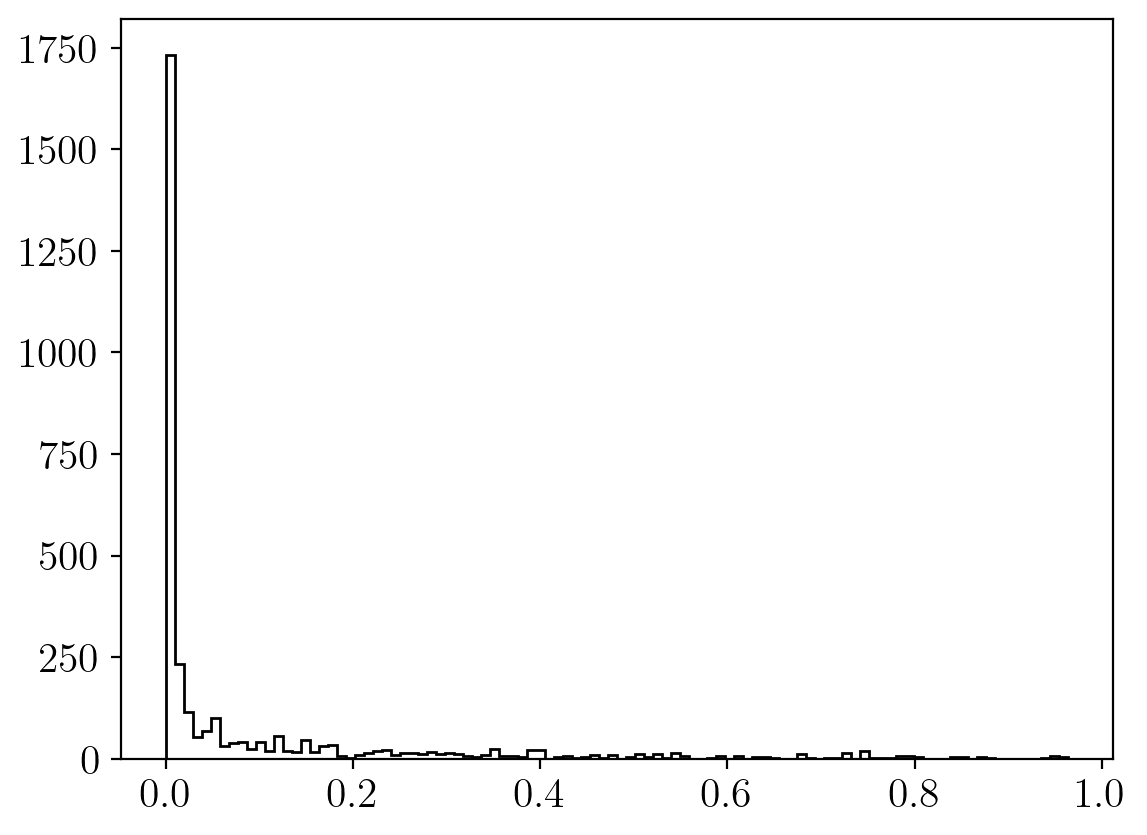

In [92]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")

(array([ 36.,   2.,  53.,  25.,  12.,  13.,  39.,   5.,   2.,  31.,   2.,
          9.,  29.,  24.,  12.,  14.,   1.,  24.,  25.,   4.,  51.,  22.,
         11.,  39.,  12.,  26.,  12.,   7.,  21.,  28.,  19.,  17.,  32.,
          8.,  41.,  26.,  18.,  21.,  28.,  22.,  19.,  23.,  16.,  22.,
         56.,  49.,  54.,  43.,  53.,  40.,  41.,  45.,  48.,  33.,  61.,
         23.,  75.,  81.,  38.,  90.,  89.,  92.,  58.,  83.,  57.,  68.,
        120.,  93.,  80.,  93.,  56.,  51.,  54.,  47.,  31.,  16.,  16.,
         26.,  46.,  18.,   8.,  19.,  25.,   7.,  15.,  32.,  19.,  15.,
          6.,  17.,   7.,  44.,   6.,  11.,   7.,   0.,   5.,   3.,  11.,
         16.]),
 array([  0.56332051,   4.10763679,   7.65195307,  11.19626934,
         14.74058562,  18.2849019 ,  21.82921818,  25.37353446,
         28.91785073,  32.46216701,  36.00648329,  39.55079957,
         43.09511584,  46.63943212,  50.1837484 ,  53.72806468,
         57.27238096,  60.81669723,  64.36101351,  67.90532979

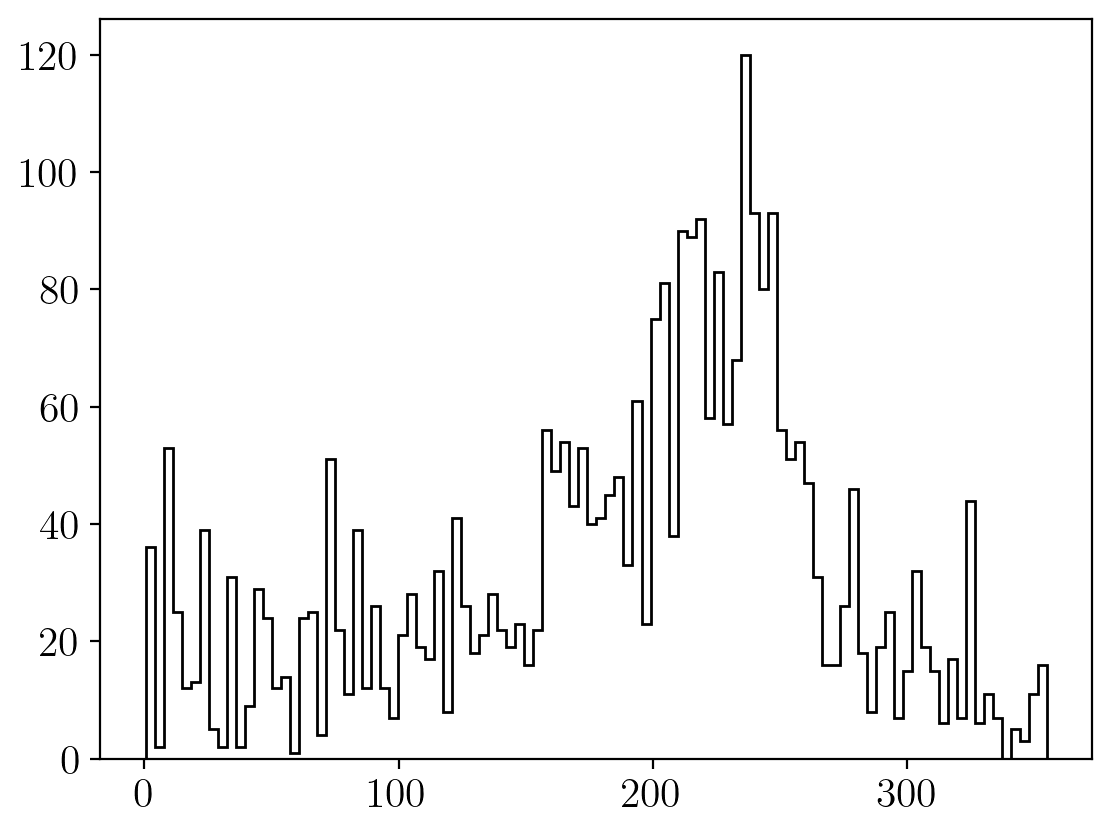

In [93]:
plt.hist(samples[:, 1], 100, color="k", histtype="step")

In [94]:
sampler.reset()
sampler.run_mcmc(state, 10000)

State([[1.26098878e-03 2.66314585e+02 3.87159874e+01]
 [1.22062902e-03 2.66604755e+02 7.41544019e+01]
 [1.00431425e-03 2.49650794e+02 4.98848600e+01]
 [9.95561108e-04 2.67665975e+02 6.25259764e+01]
 [1.10611776e-03 2.50402160e+02 5.36326241e+01]
 [1.15213699e-03 2.53437142e+02 5.70568546e+01]
 [1.12692539e-03 2.51065871e+02 5.68314780e+01]
 [1.03121627e-03 2.52159570e+02 5.29098409e+01]
 [9.04978730e-04 2.70328554e+02 2.71062004e+01]
 [9.67748571e-04 2.64709612e+02 6.43416683e+01]
 [9.80803554e-04 2.68118230e+02 2.89381474e+01]
 [9.48184858e-04 2.80225374e+02 1.63052696e+01]
 [9.52788139e-04 2.78463957e+02 4.28337541e+01]
 [9.68119208e-04 2.83670267e+02 5.37629282e+01]
 [9.37464245e-04 2.49309130e+02 5.59433602e+01]
 [9.29633247e-04 2.54415758e+02 5.02493938e+01]
 [1.01557790e-03 2.62441566e+02 5.90860814e+01]
 [8.73819632e-04 2.70513589e+02 5.03202246e+01]
 [1.05240681e-03 2.56962620e+02 5.15135966e+01]
 [9.47088560e-04 2.57838386e+02 4.46708548e+01]
 [7.24327611e-04 1.53056244e+00 3.

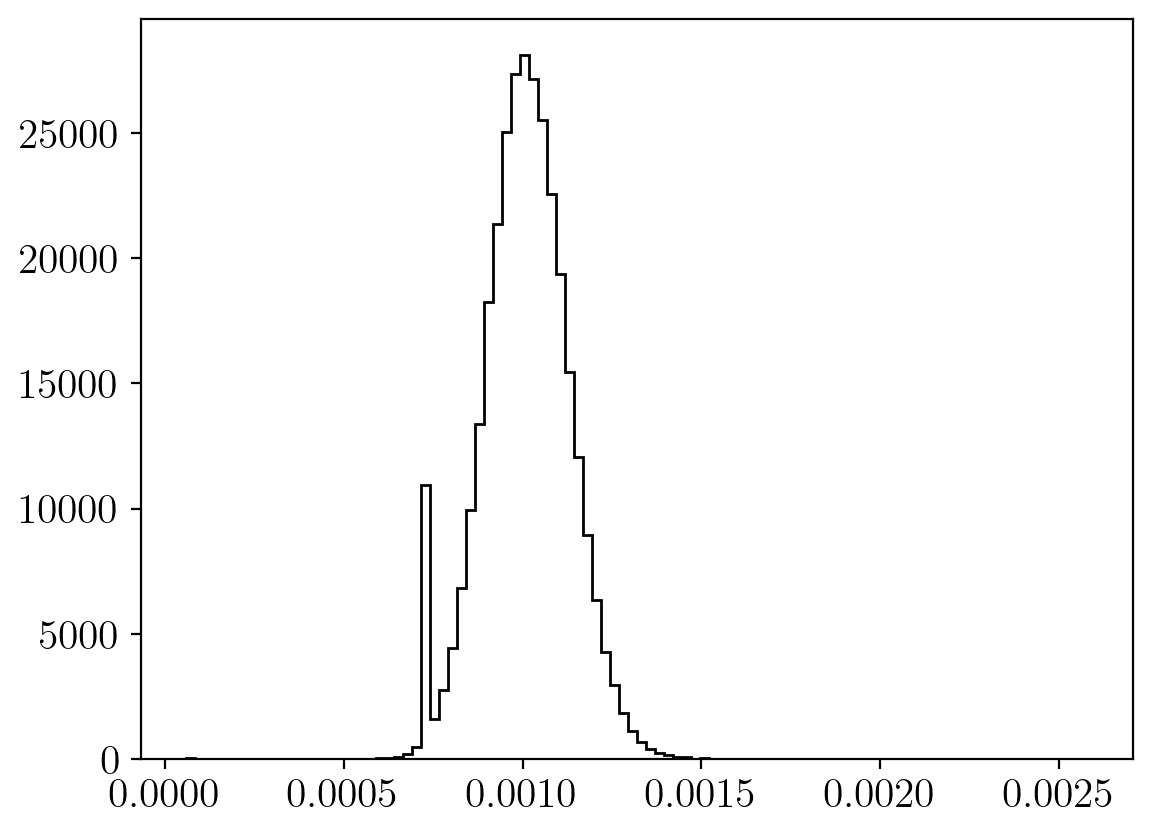

In [95]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.savefig('../plots/emcee_dip_g0p001_ET_A#.png',dpi=600)

In [96]:
np.savetxt('emcee_sample_dip_g0p001_ET_A#.txt',samples)

In [97]:
# samples = np.loadtxt('emcee_sample_dip_g0p001.txt')

In [98]:
samples[:,0]*=1e3

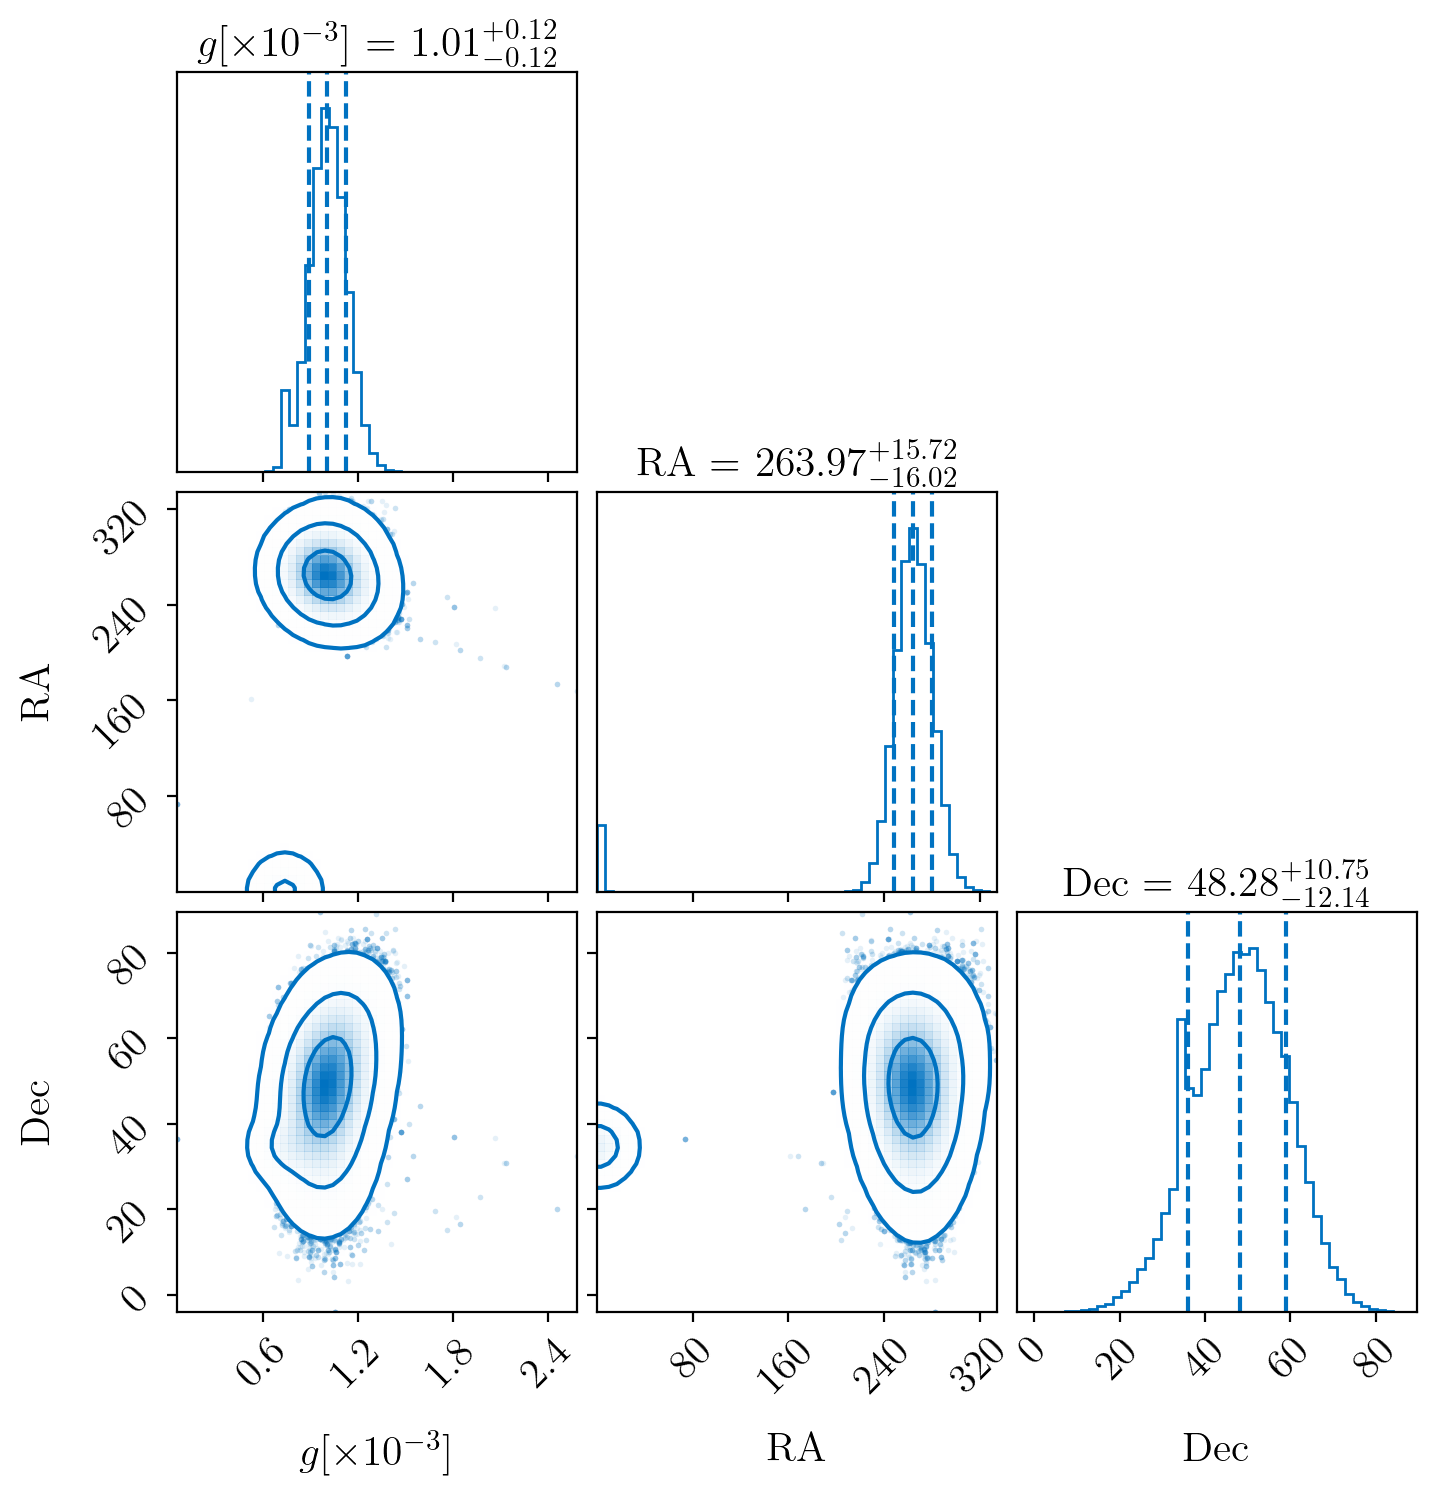

In [99]:
labels=[r'$g[\times 10^{-3}]$', 'RA', 'Dec']

fig = corner.corner(samples,quantiles=[0.16, 0.5, 0.84], show_titles=True, bins=50, smooth=2, label_kwargs=dict(fontsize=15), color='#0072C1', levels=(1-np.exp(-0.5),1-np.exp(-2),1-np.exp(-4.5)), title_kwargs={"fontsize": 15},labels=labels)
plt.savefig('../plots/emcee_dip_g0p001_corner_ET_A#.pdf',bbox_inches='tight')

In [38]:
def logprob_dl_g_H0(H0glb, ra_arr, dec_arr, zs_arr, dl_mean, dl_std, Om0=0.3):
    H0 = H0glb[0]
    g = H0glb[1]
    l = H0glb[2]
    b = H0glb[3]

    if 0<=g<1 and 0<=l<360 and -90<=b<=90 and 10<H0<200:

        dipole_gal = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
        dipole_ICRS = dipole_gal.transform_to('icrs')

        phi_dipole = dipole_ICRS.ra.value*np.pi/180
        theta_dipole = np.pi/2-dipole_ICRS.dec.value*np.pi/180

        nx_dipole = np.cos(phi_dipole)*np.sin(theta_dipole)
        ny_dipole = np.sin(phi_dipole)*np.sin(theta_dipole)
        nz_dipole = np.cos(theta_dipole)

        chi2 = 0

        for i in range(len(ra_arr)):
            phi = ra_arr[i]
            theta = np.pi/2-np.array(dec_arr[i])

            nx = np.cos(phi)*np.sin(theta)
            ny = np.sin(phi)*np.sin(theta)
            nz = np.cos(theta)

            dipole = g*(nx_dipole*nx + ny_dipole*ny + nz_dipole*nz)

            astropy_cosmology = FlatLambdaCDM(Om0=Om0,H0=H0)
            zt = (1+zs_arr[i])/(1+dipole) -1
            dl_0 = astropy_cosmology.luminosity_distance(zt).value
            dl_g = dl_0*(1+dipole)

            chi2 += (dl_mean[i]-dl_g)**2 / dl_std[i]**2
        
        logprob = -0.5*chi2

    else:
        logprob = -np.inf

    return logprob

In [39]:
nwalkers = 32
ndim = 4
p0 = np.random.rand(nwalkers, ndim)*np.array([190,1,360,180]) - np.array([-10,0,0,90])
print(p0)

[[ 8.53959370e+01  2.34160870e-02  1.59869286e+02  8.16747884e+01]
 [ 7.57239478e+01  7.90963708e-01  3.21574939e+02  1.09470886e+00]
 [ 4.73938042e+01  5.27446275e-01  5.05438506e+00 -1.62336297e-01]
 [ 1.66616428e+02  6.20475825e-01  2.89728912e+02  7.85165528e+01]
 [ 1.74223427e+02  5.58243287e-01  2.46527068e+01  3.76345197e+01]
 [ 1.33013981e+01  1.12522973e-01  1.46006254e+02 -7.79244363e+01]
 [ 6.96699644e+01  5.14891583e-02  1.87869250e+02 -4.28808926e+01]
 [ 1.86532168e+02  8.49620457e-02  2.85522369e+02  2.79016340e+00]
 [ 1.19439840e+01  9.18553330e-01  1.27863814e+02 -7.85129055e+00]
 [ 5.05629531e+01  7.66783432e-01  2.06044108e+02  6.64379001e+01]
 [ 9.45165264e+01  4.35245948e-01  1.85384565e+02  6.75343563e+01]
 [ 1.72422620e+02  3.87541142e-01  3.36646904e+02 -7.44596549e+01]
 [ 4.70196226e+01  4.29892295e-01  2.01125504e+02  7.15090745e+01]
 [ 6.02117092e+01  7.72492278e-01  1.66689889e+02 -5.20621910e+01]
 [ 6.42329690e+01  3.04061069e-01  1.19770788e+02 -3.97877954e

In [40]:
logprob_dl_g_H0(p0[0], ra_mean, dec_mean, z0, dl_mean, dl_std)

-15212.258993873715

In [41]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, logprob_dl_g_H0, args=[ra_mean, dec_mean, z0, dl_mean, dl_std])


In [42]:
state = sampler.run_mcmc(p0, 100)


(array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   1.,   3.,
          0.,   0.,   3.,   0.,   3.,   0.,  10.,   1.,  13.,   5.,   0.,
          2.,  13.,   4.,   5.,  17.,  16.,  38.,  10.,  59., 212., 368.,
        167., 111., 189.,  77., 123.,  57.,  48.,  69.,  91.,  39.,  63.,
         22.,  55., 100.,  42., 110.,  59.,  60.,  32.,  28.,  16.,  25.,
         17.,  24.,  42.,  17.,  37.,  11.,  50.,  14.,   6.,  17.,  39.,
          5.,   1.,  64.,  83.,  13.,   8.,  12.,  37.,  17.,   1.,  26.,
         19.,   0.,   3.,  42.,  41.,  14.,  15.,  55.,  17.,  10.,   3.,
          6.,   6.,   3.,   1.,   0.,   6.,   7.,   9.,   7.,   0.,   0.,
         19.]),
 array([ 11.94398403,  13.80036823,  15.65675242,  17.51313662,
         19.36952082,  21.22590501,  23.08228921,  24.9386734 ,
         26.7950576 ,  28.6514418 ,  30.50782599,  32.36421019,
         34.22059438,  36.07697858,  37.93336277,  39.78974697,
         41.64613117,  43.50251536,  45.35889956,  47.21528375

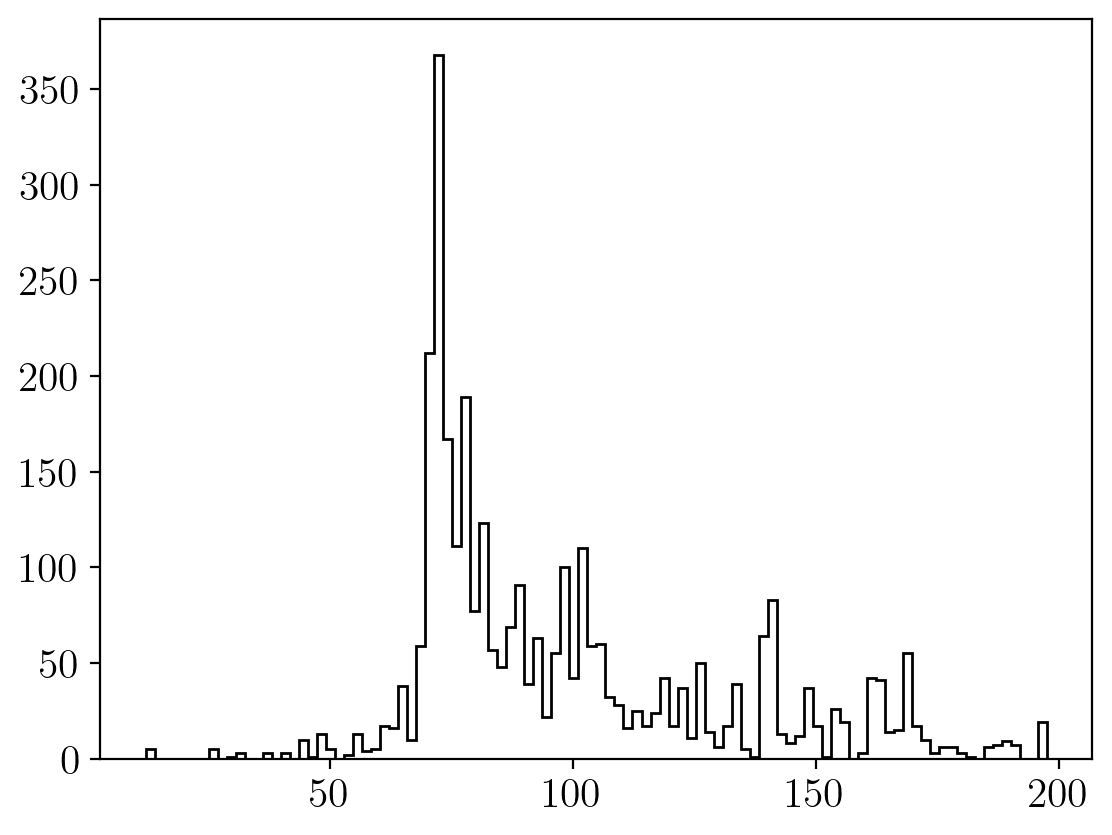

In [43]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")

In [44]:
sampler.reset()
sampler.run_mcmc(state, 10000)

State([[ 7.00279696e+01  9.47164932e-04  3.02902090e+02  6.49546221e+01]
 [ 6.98558693e+01  1.16266955e-03  2.85768198e+02  6.61327577e+01]
 [ 7.02812273e+01  8.40927784e-04  2.37746850e+02  5.33406328e+01]
 [ 7.00152359e+01  8.93870404e-04  2.56891603e+02  2.17353271e+01]
 [ 7.00673626e+01  1.49602038e-03  1.71851603e+02  8.96083252e+01]
 [ 7.04499205e+01  1.14620354e-03  3.22363884e+02  8.28225591e+01]
 [ 7.01969159e+01  1.12755991e-03  3.07765079e+02  6.07636255e+01]
 [ 7.01470186e+01  1.30972564e-03  3.50189755e+02  6.64361424e+01]
 [ 7.04553949e+01  8.09878934e-04  2.25269451e+02  6.24469902e+01]
 [ 7.03776118e+01  1.03003721e-03  9.28740088e+01  8.67333018e+01]
 [ 7.06011956e+01  1.38146305e-03  5.02447054e+01  7.51885195e+01]
 [ 6.98734654e+01  1.20741938e-03  2.54734405e+02  5.14360731e+01]
 [ 7.04186772e+01  1.66190622e-03  4.51740280e+01  8.32269967e+01]
 [ 7.04502083e+01  8.99258273e-04  2.16136579e+02  5.34960204e+01]
 [ 7.05851528e+01  7.66134859e-04  1.37288484e+02  8.333

Text(0, 0.5, 'Count')

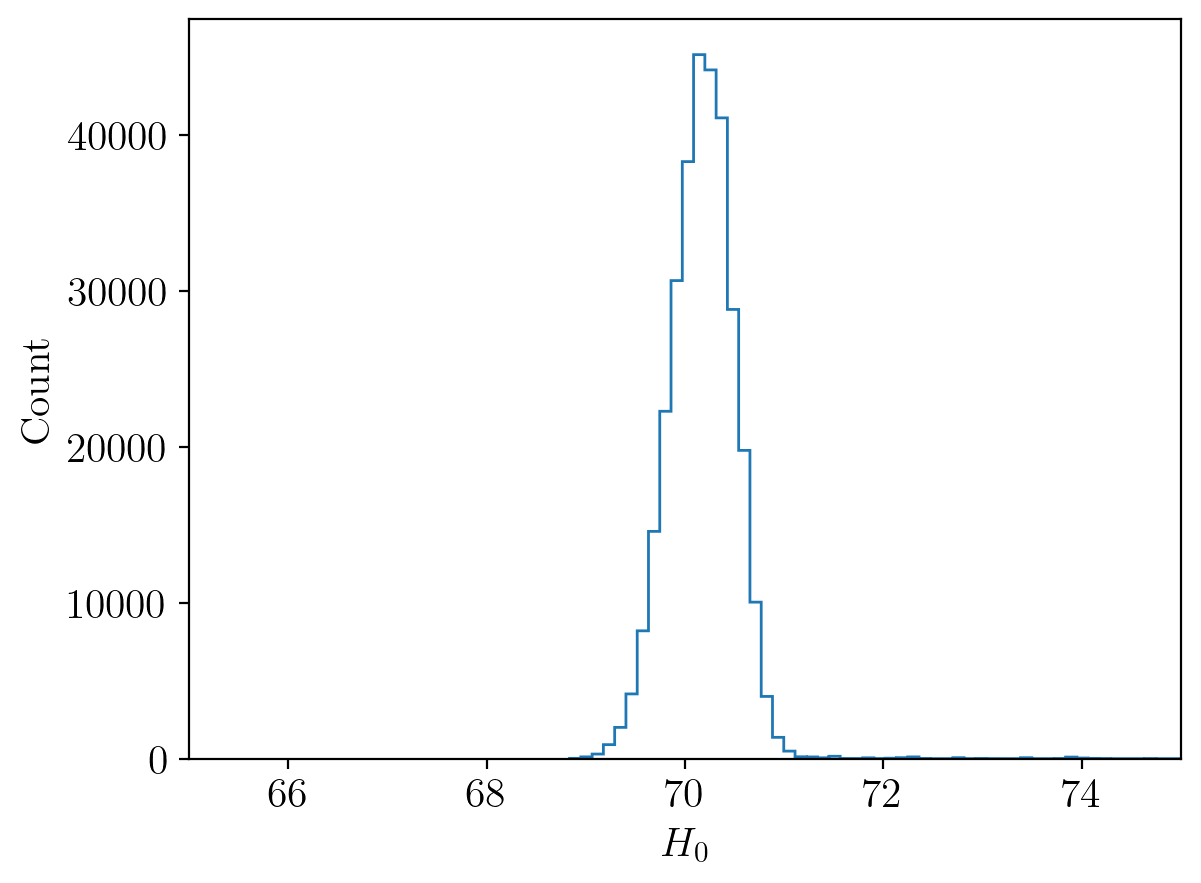

In [45]:
samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 1000, histtype="step")
plt.xlim(65,75)
plt.xlabel(r'$H_0$')
plt.ylabel('Count')

In [46]:
np.savetxt('emcee_sample_dip_g0p001_H0_ET_A#.txt',samples)

In [47]:
samples[:,1]*=1e3

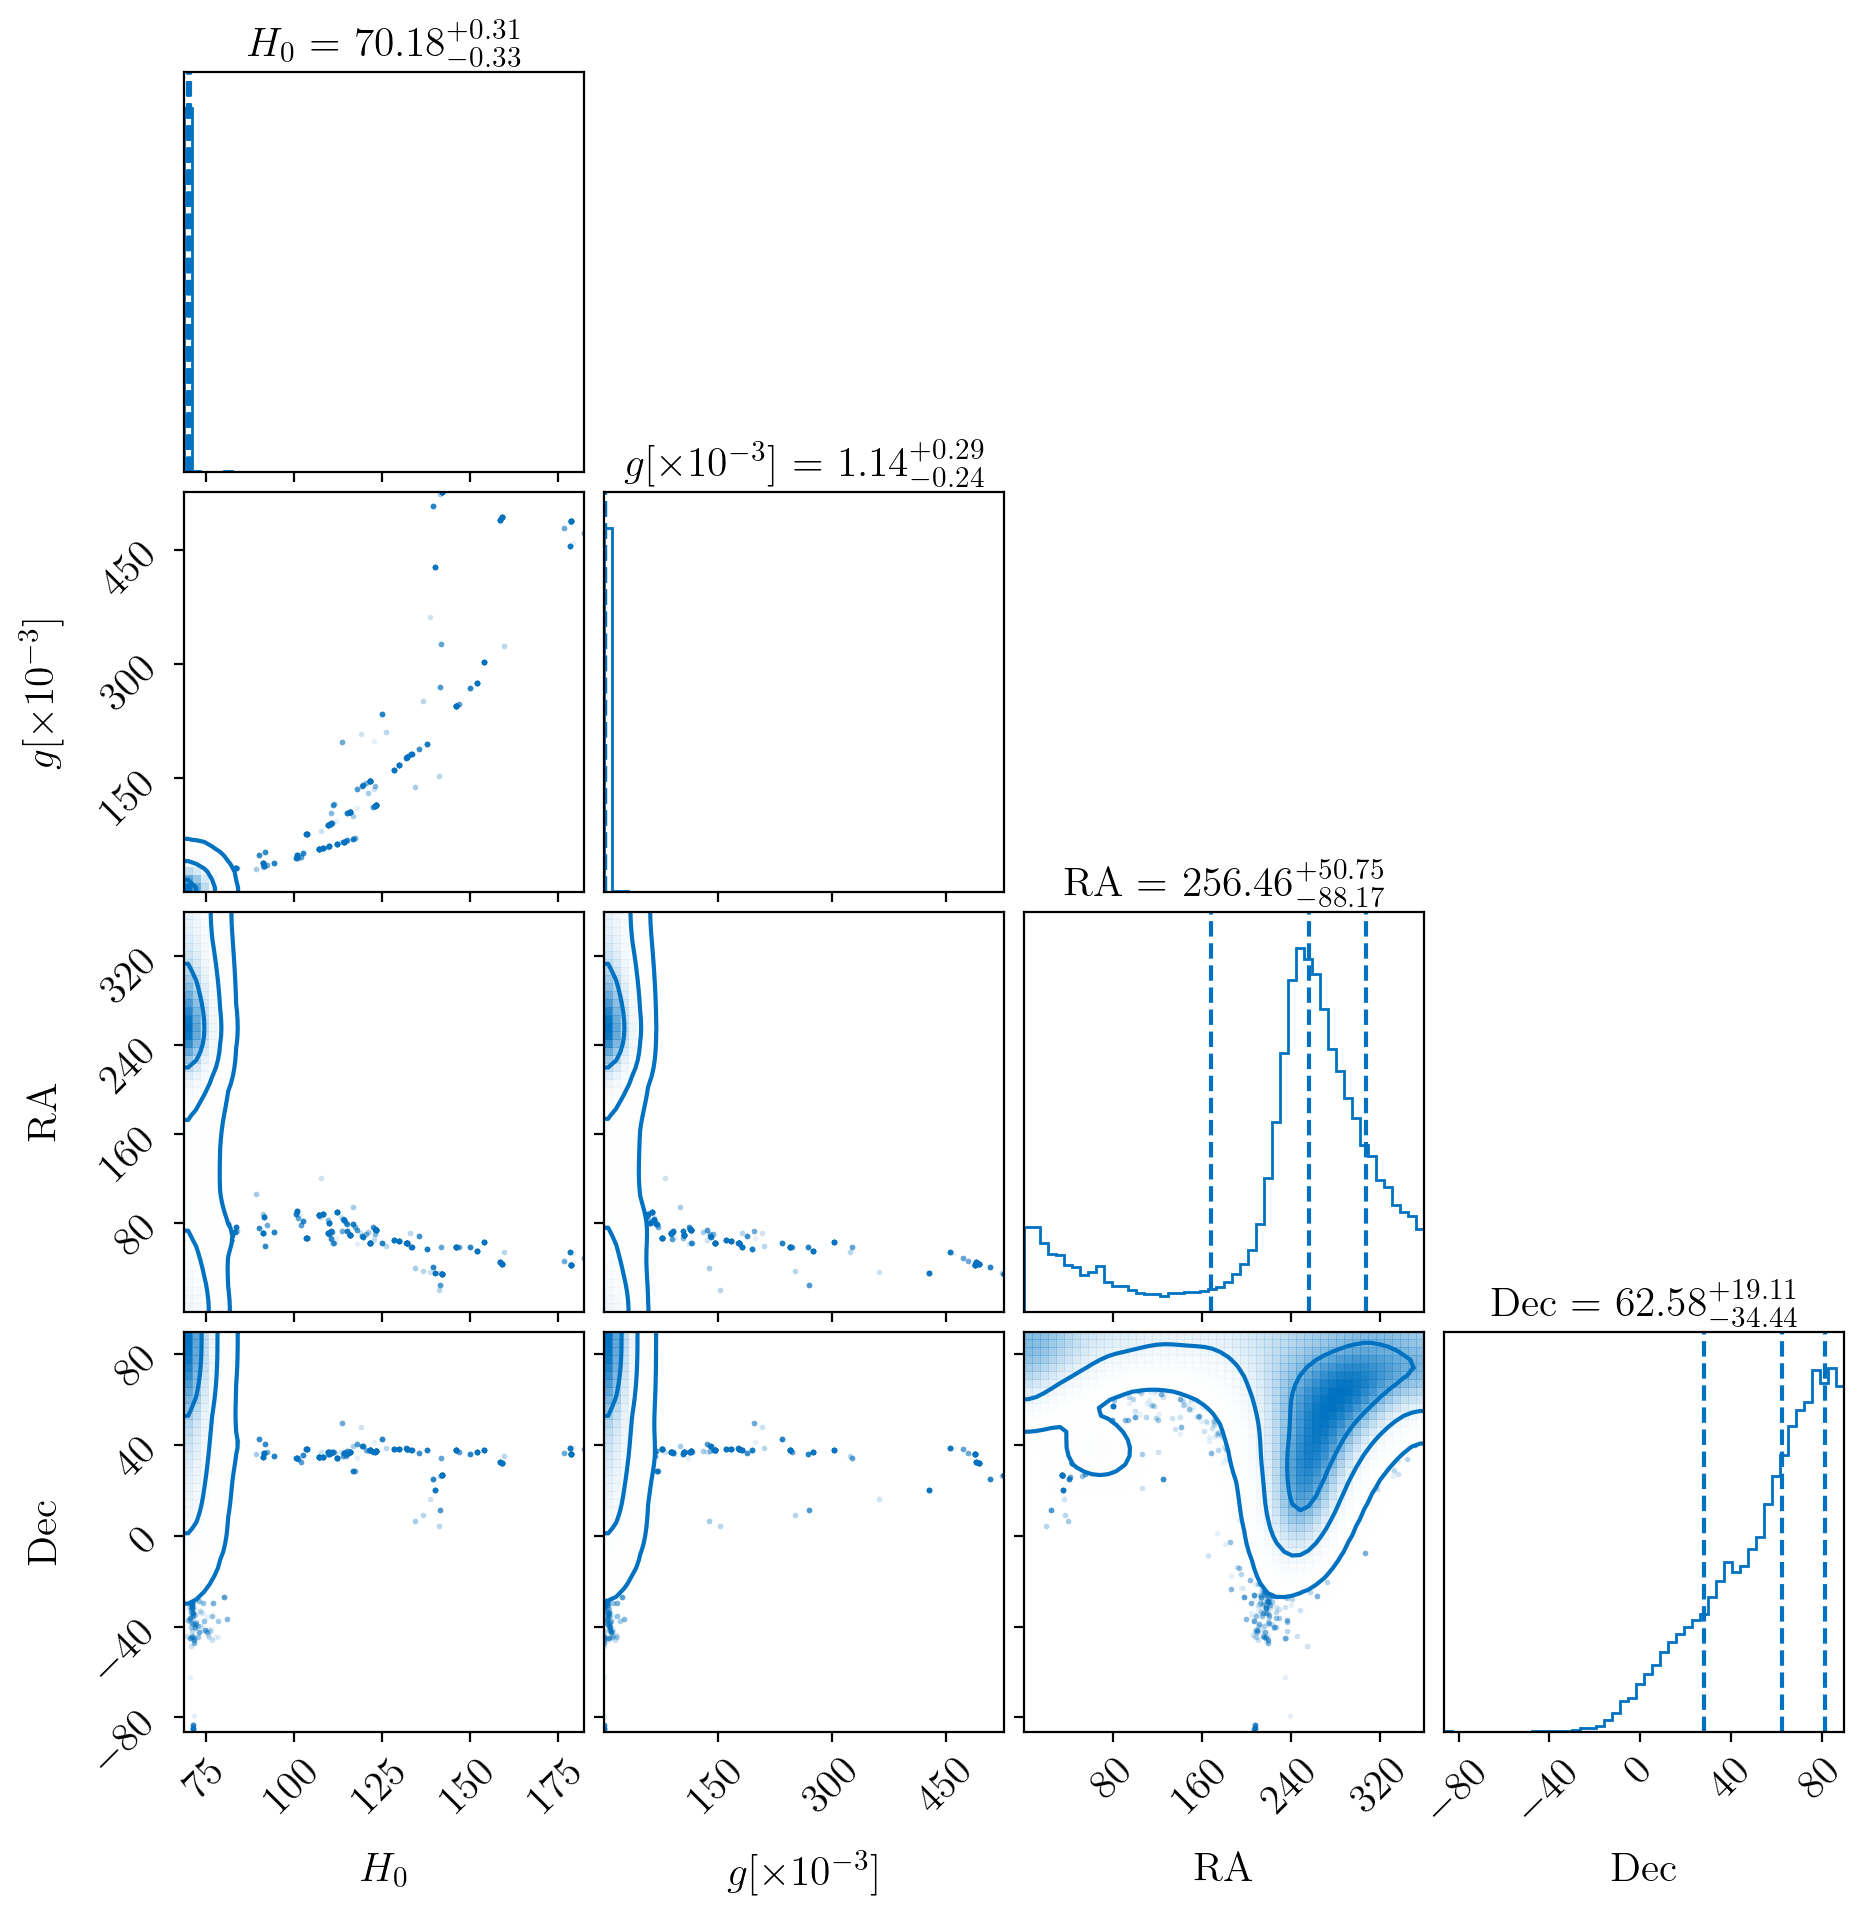

In [48]:
labels=[r'$H_0$',r'$g[\times 10^{-3}]$', 'RA', 'Dec']

fig = corner.corner(samples,quantiles=[0.16, 0.5, 0.84], show_titles=True, bins=50, smooth=2, label_kwargs=dict(fontsize=15), color='#0072C1', levels=(1-np.exp(-0.5),1-np.exp(-2),1-np.exp(-4.5)), title_kwargs={"fontsize": 15},labels=labels)
plt.savefig('../plots/emcee_dip_g0p001_H0_corner_ET_A#.pdf',bbox_inches='tight')

In [49]:
samples = np.loadtxt('emcee_sample_dip_g0p001_H0_ET_A#.txt')

In [50]:
samples[:,1]*=1e3

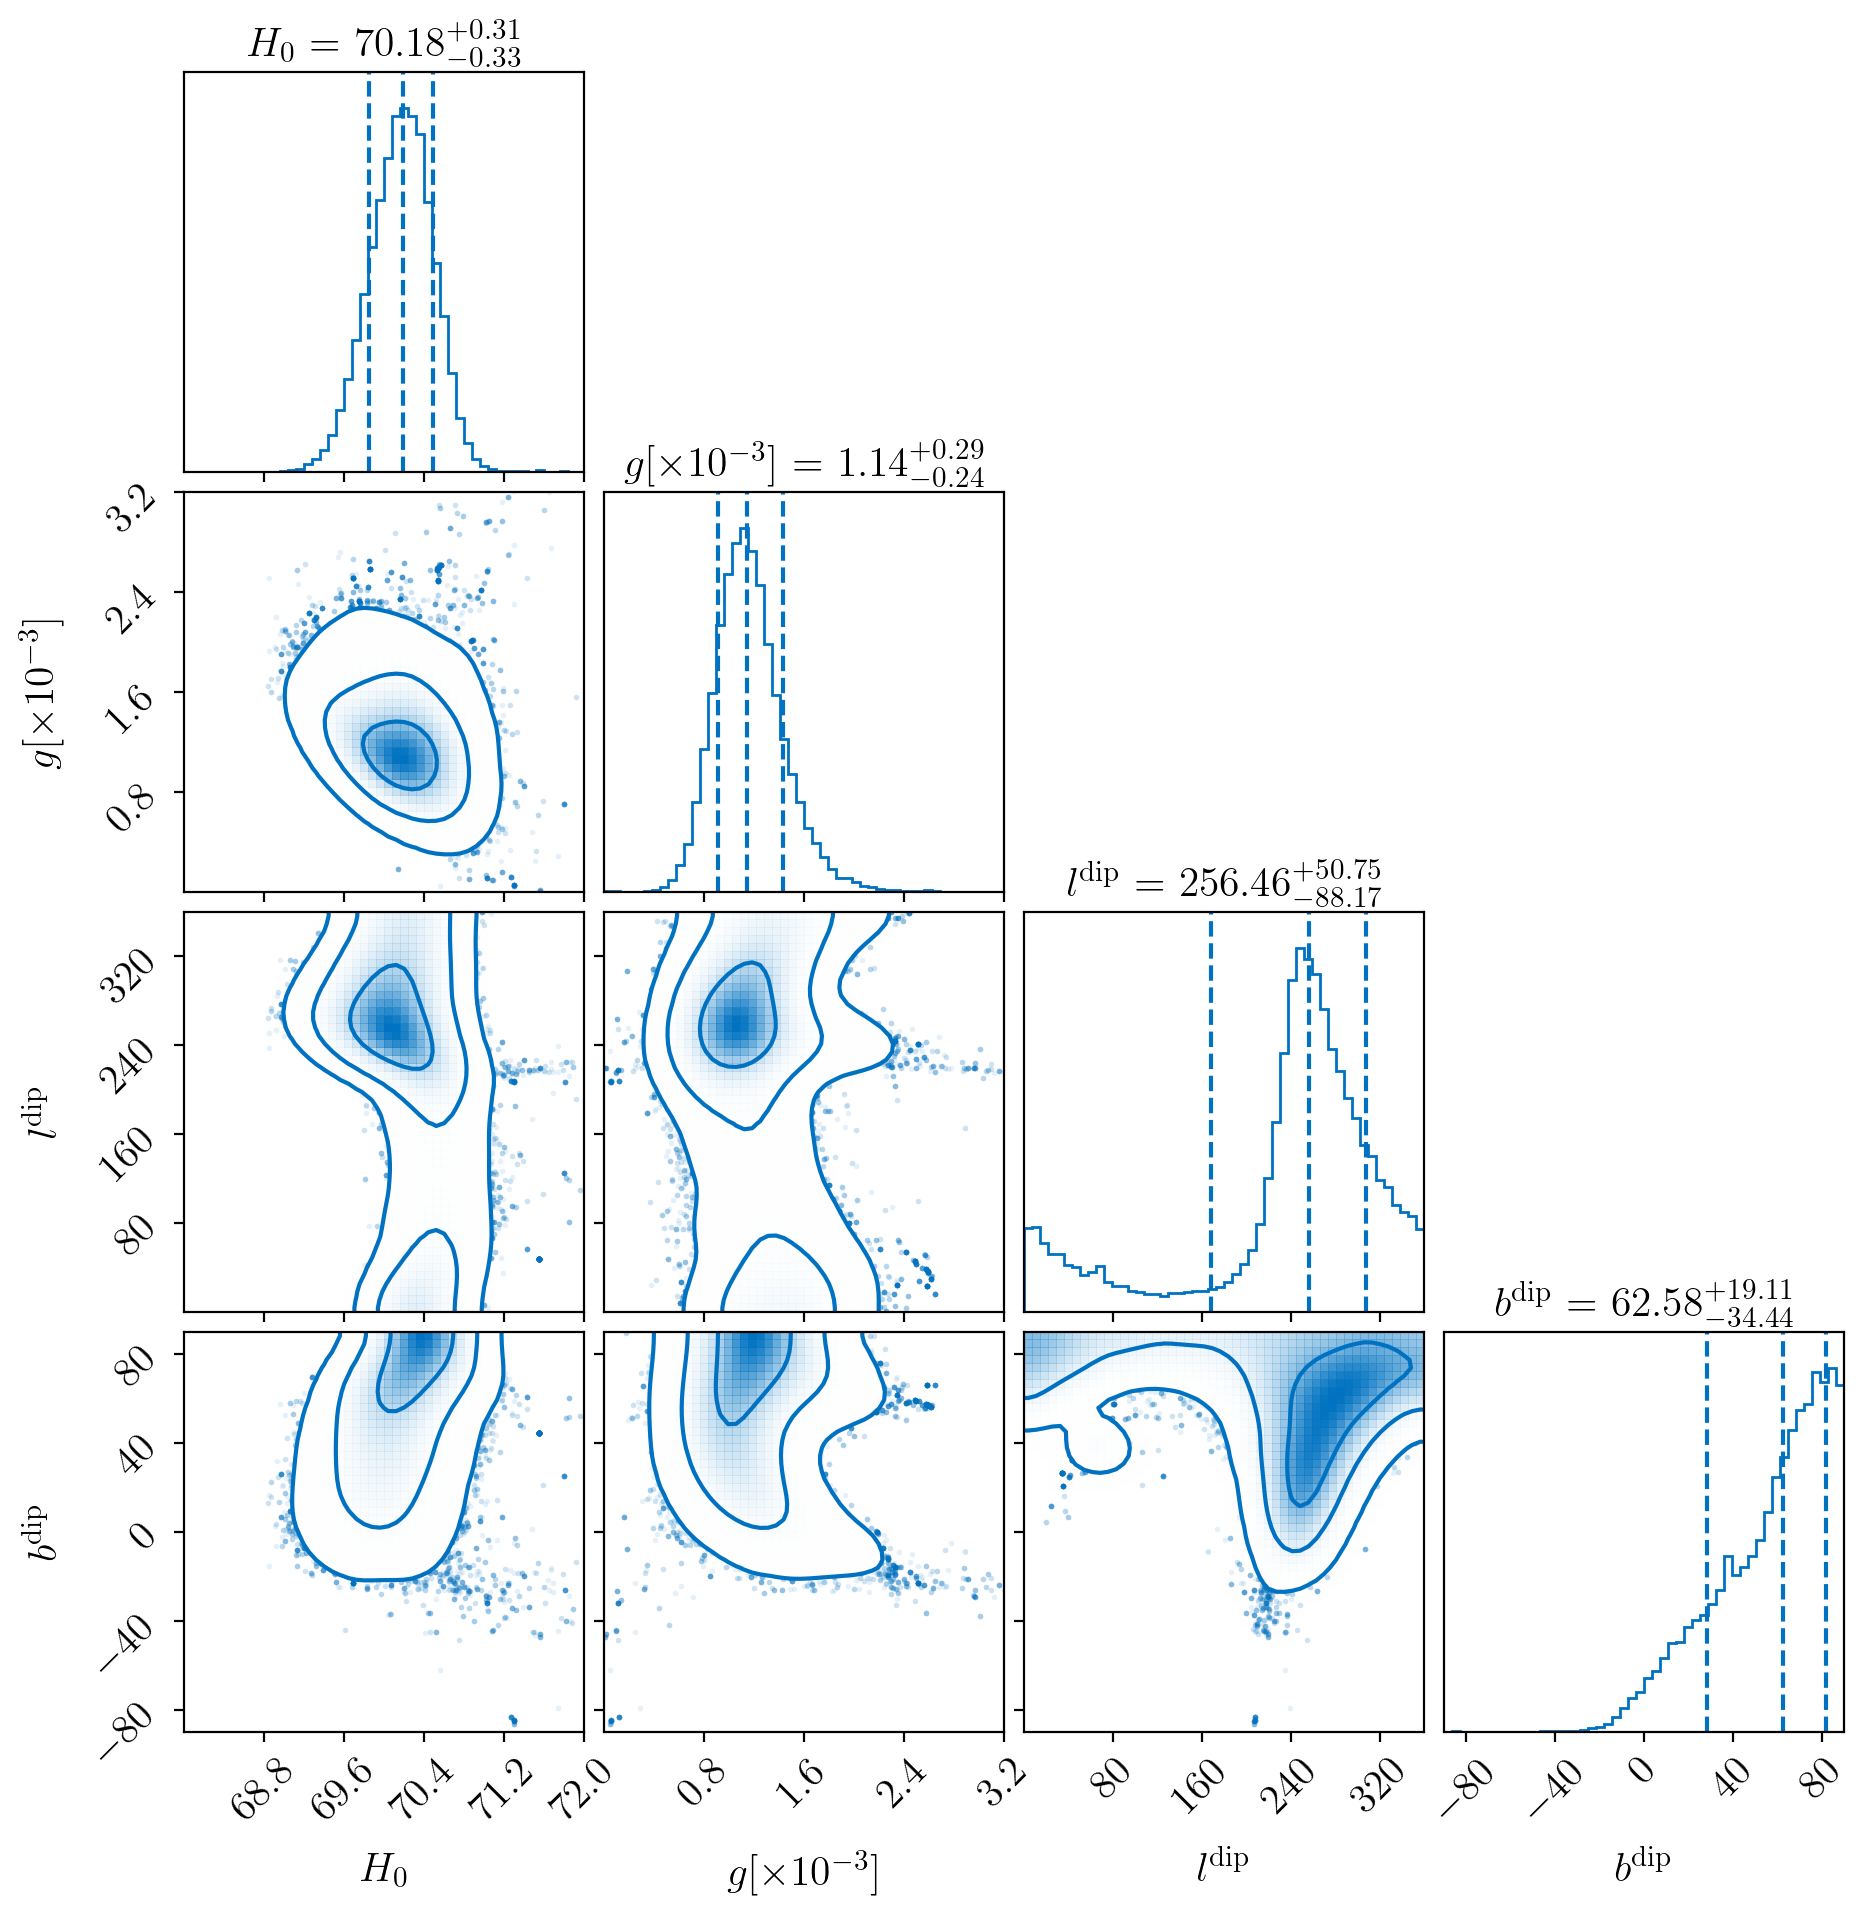

In [55]:
labels=[r'$H_0$',r'$g[\times 10^{-3}]$', r'$l^{\rm dip}$', r'$b^{\rm dip}$']

fig = corner.corner(np.array(samples), range=[(68,72),(0.,3.2),(0,360),(-90,90)], quantiles=[0.16, 0.5, 0.84], show_titles=True, bins=50, smooth=2, label_kwargs=dict(fontsize=15), color='#0072C1', levels=(1-np.exp(-0.5),1-np.exp(-2),1-np.exp(-4.5)), title_kwargs={"fontsize": 15},labels=labels)
plt.savefig('../plots/emcee_dip_g0p001_H0_corner_ET_A#_zoom.pdf',bbox_inches='tight')

In [114]:
Omega_m=0.3
Omega_Lambda=0.7

integrand = lambda zz: 1./np.sqrt(Omega_m*(1+zz)**3 + Omega_Lambda)

dlH0overc = []
for i in range(len(index_all)):
    zarr = np.linspace(0,z0[i],1000)
    dlH0overc.append((1+z0[i])*simps(integrand(zarr), zarr))

H0 = np.array(dlH0overc)* C_SI*1e-3 / np.array(dl_mean)


/tmp/ipykernel_21232/1784687697.py:9: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  dlH0overc.append((1+z0[i])*simps(integrand(zarr), zarr))


In [115]:
import astropy.coordinates as coord
import matplotlib as mpl
plt.rcParams.update({'font.size': 15})
mpl.rcParams['text.usetex'] = True

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def coordinates_aitoff_plot(coords,H0):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    # fig.subplots_adjust(bottom=0.2)

    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian,marker='.',s=100,
                    c=H0,cmap='coolwarm')

    def fmt_func_x(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    xticker = mpl.ticker.FuncFormatter(fmt_func_x)
    ax.xaxis.set_major_formatter(xticker)
    ax.xaxis.set_ticks([-np.pi*2/3,-np.pi/3,0,np.pi/3,np.pi*2/3])
    # ax.yaxis.set_ticks([-np.pi/3,-np.pi/6,0,np.pi/3,np.pi/6])

    ax.grid()
    
    cb = fig.colorbar(cs)
    cb.set_label(r'$H_0~[{\rm km}~{\rm s}^{-1}~{\rm Mpc}^{-1}]$')
    cb.set_ticks([min(H0),70,max(H0)])
    # plt.clim(-0.01,0.01)
    
    return fig, ax

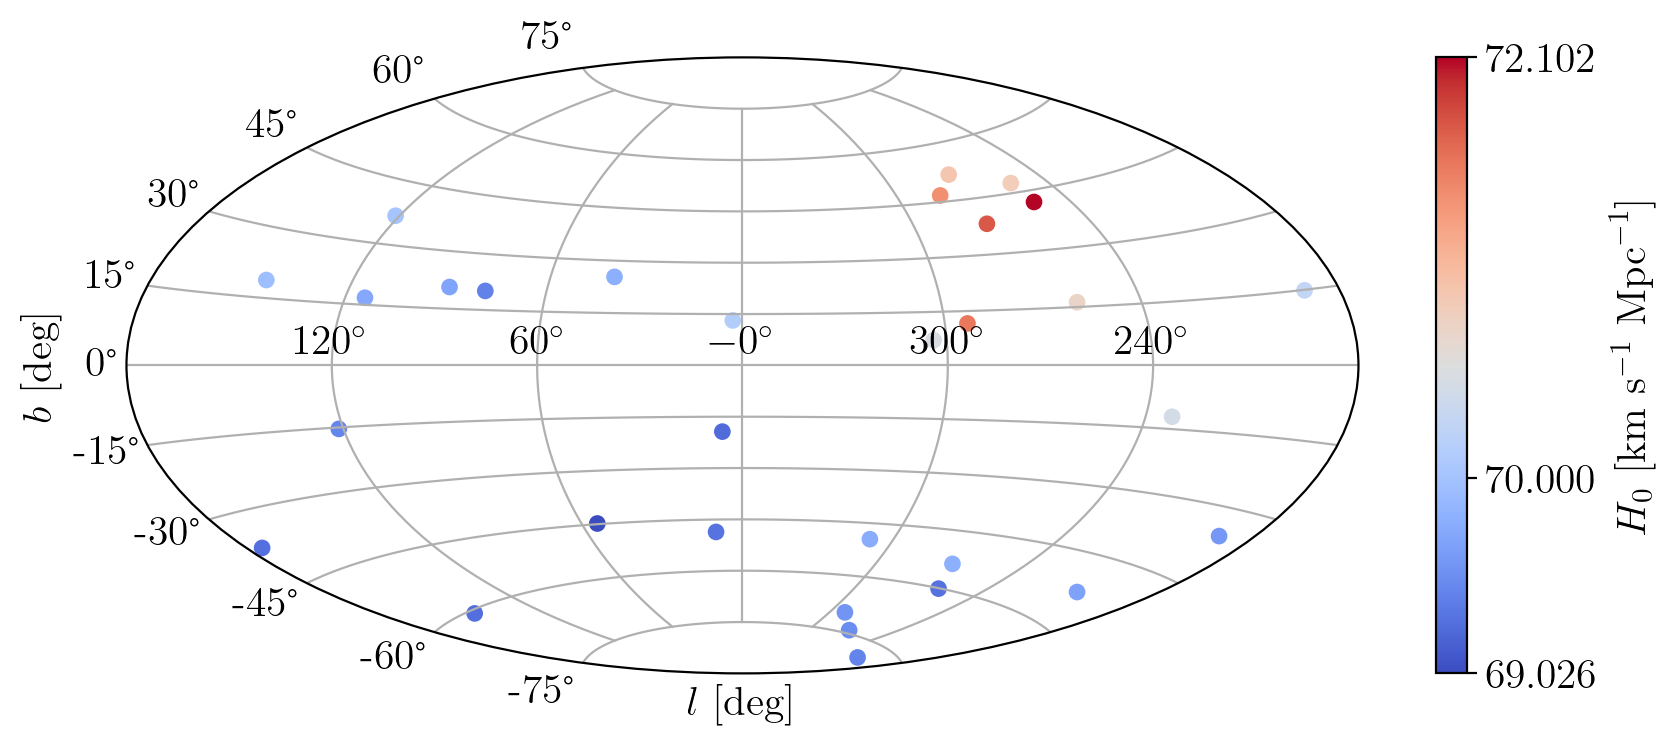

In [116]:
coord_golden = SkyCoord(ra_mean*u.radian, dec_mean*u.radian, frame='icrs')

fig, ax = coordinates_aitoff_plot(coord_golden.galactic,H0);
ax.set_xlabel('$l$ [deg]')
ax.set_ylabel('$b$ [deg]')
plt.savefig('../plots/H0_ET_A#_golden_g0p001.png',dpi=600)